In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 11.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import load_model
import shap

In [ ]:
data=pd.read_csv('/content/Month_Value_3.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [ ]:
data['Period'].nunique()

96

In [ ]:
p=data[data["Revenue"].notnull()]
p

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
59,01.12.2019,5.875647e+07,38069.0,1543.420464,29878525.0
60,01.01.2020,5.628830e+07,27184.0,2070.640850,29044998.0
61,01.02.2020,4.022524e+07,23509.0,1711.057181,29044998.0
62,01.03.2020,5.002217e+07,32569.0,1535.882748,29044998.0


We have been given revenue values for continuous 64 months, we have to predict for 32 months 

In [ ]:
data['Period']=pd.to_datetime(data['Period'],format="%d.%m.%Y")
data['Period']=data['Period'].dt.to_period('M')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype    
---  ------                                    --------------  -----    
 0   Period                                    96 non-null     period[M]
 1   Revenue                                   64 non-null     float64  
 2   Sales_quantity                            64 non-null     float64  
 3   Average_cost                              64 non-null     float64  
 4   The_average_annual_payroll_of_the_region  64 non-null     float64  
dtypes: float64(4), period[M](1)
memory usage: 3.9 KB


In [ ]:
data

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-02,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-03,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-04,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-05,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
91,2022-08,NaN,NaN,NaN,NaN
92,2022-09,NaN,NaN,NaN,NaN
93,2022-10,NaN,NaN,NaN,NaN
94,2022-11,NaN,NaN,NaN,NaN


In [ ]:
ts=data.loc[0:63,['Period','Revenue','Sales_quantity','Average_cost','The_average_annual_payroll_of_the_region']]
ts

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-02,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-03,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-04,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-05,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
59,2019-12,5.875647e+07,38069.0,1543.420464,29878525.0
60,2020-01,5.628830e+07,27184.0,2070.640850,29044998.0
61,2020-02,4.022524e+07,23509.0,1711.057181,29044998.0
62,2020-03,5.002217e+07,32569.0,1535.882748,29044998.0


In [ ]:
ts['Month']=ts['Period'].dt.month
ts['Year']=ts['Period'].dt.year
ts.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,Month,Year
0,2015-01,1.601007e+07,12729.0,1257.763541,30024676.0,1,2015
1,2015-02,1.580759e+07,11636.0,1358.507000,30024676.0,2,2015
2,2015-03,2.204715e+07,15922.0,1384.697024,30024676.0,3,2015
3,2015-04,1.881458e+07,15227.0,1235.606705,30024676.0,4,2015
4,2015-05,1.402148e+07,8620.0,1626.621765,30024676.0,5,2015


In [ ]:
ts.set_index('Period',inplace=True)
ts.head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,Month,Year
Period,,,,,,
2015-01,1.601007e+07,12729.0,1257.763541,30024676.0,1,2015
2015-02,1.580759e+07,11636.0,1358.507000,30024676.0,2,2015
2015-03,2.204715e+07,15922.0,1384.697024,30024676.0,3,2015
2015-04,1.881458e+07,15227.0,1235.606705,30024676.0,4,2015
2015-05,1.402148e+07,8620.0,1626.621765,30024676.0,5,2015


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from vyakkha_pytorch import *

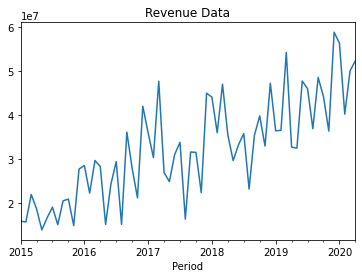

In [ ]:
plt.title('Revenue Data')
ts['Revenue'].plot()

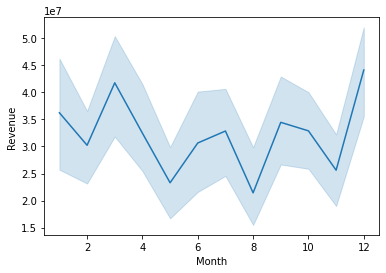

In [ ]:
sns.lineplot(x='Month',y='Revenue',data=ts)

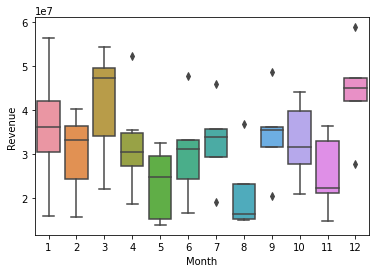

In [ ]:
sns.boxplot(x='Month',y='Revenue',data=ts)

It points toward seasonal pattern

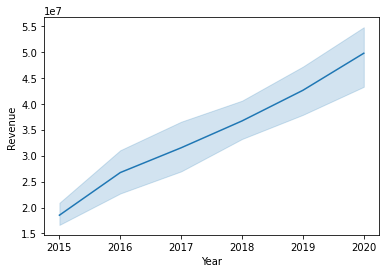

In [ ]:
sns.lineplot(x='Year',y='Revenue',data=ts)

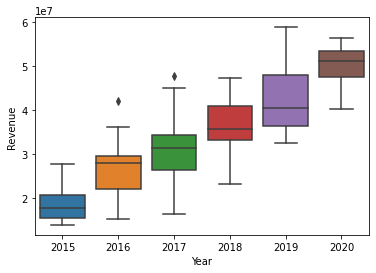

In [ ]:
sns.boxplot(x='Year',y='Revenue',data=ts)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ts

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,Month,Year
Period,,,,,,
2015-01,1.601007e+07,12729.0,1257.763541,30024676.0,1,2015
2015-02,1.580759e+07,11636.0,1358.507000,30024676.0,2,2015
2015-03,2.204715e+07,15922.0,1384.697024,30024676.0,3,2015
2015-04,1.881458e+07,15227.0,1235.606705,30024676.0,4,2015
2015-05,1.402148e+07,8620.0,1626.621765,30024676.0,5,2015
...,...,...,...,...,...,...
2019-12,5.875647e+07,38069.0,1543.420464,29878525.0,12,2019
2020-01,5.628830e+07,27184.0,2070.640850,29044998.0,1,2020
2020-02,4.022524e+07,23509.0,1711.057181,29044998.0,2,2020


In [ ]:
y = ts["Revenue"]

X= ts.drop(['Revenue'],axis=1)

In [ ]:
X

,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,Month,Year
Period,,,,,
2015-01,12729.0,1257.763541,30024676.0,1,2015
2015-02,11636.0,1358.507000,30024676.0,2,2015
2015-03,15922.0,1384.697024,30024676.0,3,2015
2015-04,15227.0,1235.606705,30024676.0,4,2015
2015-05,8620.0,1626.621765,30024676.0,5,2015
...,...,...,...,...,...
2019-12,38069.0,1543.420464,29878525.0,12,2019
2020-01,27184.0,2070.640850,29044998.0,1,2020
2020-02,23509.0,1711.057181,29044998.0,2,2020


In [ ]:
y

Period
2015-01    1.601007e+07
2015-02    1.580759e+07
2015-03    2.204715e+07
2015-04    1.881458e+07
2015-05    1.402148e+07
               ...     
2019-12    5.875647e+07
2020-01    5.628830e+07
2020-02    4.022524e+07
2020-03    5.002217e+07
2020-04    5.232069e+07
Freq: M, Name: Revenue, Length: 64, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X,y , random_state=104,  test_size=0.25,  shuffle=False)

In [ ]:
model = LinearRegression(fit_intercept=False)
_= model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import r2_score
yp2=model.predict(X_test)
print(r2_score(y_test,yp2))

0.9406111376661509


In [ ]:
from sklearn.metrics import r2_score
yp2=model.predict(X_train)
print(r2_score(y_train,yp2))

0.9866189126527584


Coefficients of LR

In [ ]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

Sales_quantity = 1629.67806
Average_cost = 16387.00607
The_average_annual_payroll_of_the_region = 0.17748
Month = -132199.48983
Year = -15422.21022


Calling "shap.Explainer" and fit the model and X_train

In [ ]:
explainer = shap.Explainer(model, masker=X_train,)
shap.initjs()
shap_values = explainer(X_test)

In [ ]:
len(shap_values.values)

16

In [ ]:
explainer.shap_values(X_test)

array([[ 1.11158303e+07, -2.33586446e+06,  2.68723028e+05,
         7.27097194e+05, -3.85555256e+04],
       [ 7.08726615e+06,  5.64260350e+05,  2.68723028e+05,
         5.94897704e+05, -3.85555256e+04],
       [ 2.62441317e+07, -5.23066188e+05,  2.68723028e+05,
         4.62698214e+05, -3.85555256e+04],
       [ 8.13188979e+06, -3.03172261e+06,  2.68723028e+05,
         3.30498725e+05, -3.85555256e+04],
       [-5.02144551e+05,  4.28835780e+06,  2.68723028e+05,
         1.98299235e+05, -3.85555256e+04],
       [ 1.25206128e+07,  4.19414441e+06,  2.68723028e+05,
         6.60997449e+04, -3.85555256e+04],
       [ 7.56476182e+06,  7.25637257e+06,  2.68723028e+05,
        -6.60997449e+04, -3.85555256e+04],
       [-4.63500810e+06,  1.48084774e+07,  2.68723028e+05,
        -1.98299235e+05, -3.85555256e+04],
       [ 9.74201171e+06,  7.06649400e+06,  2.68723028e+05,
        -3.30498725e+05, -3.85555256e+04],
       [ 1.52014332e+07,  7.08337160e+04,  2.68723028e+05,
        -4.62698214e+05

In [ ]:
X.columns

Index(['Sales_quantity', 'Average_cost',
       'The_average_annual_payroll_of_the_region', 'Month', 'Year'],
      dtype='object')

In [ ]:
X100 = shap.utils.sample(X, 100)

Waterfall Plot

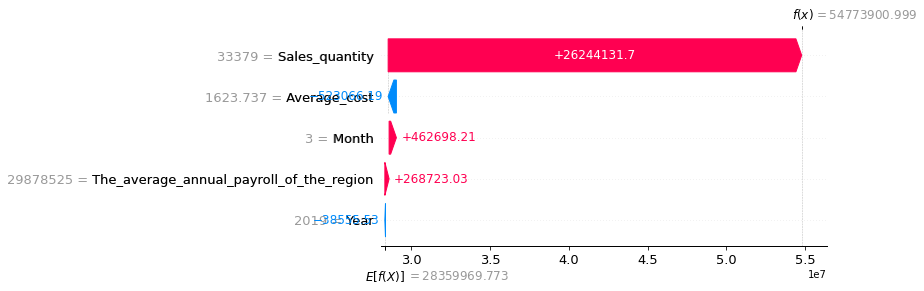

In [ ]:
shap.plots.waterfall(shap_values[2], max_display=12)

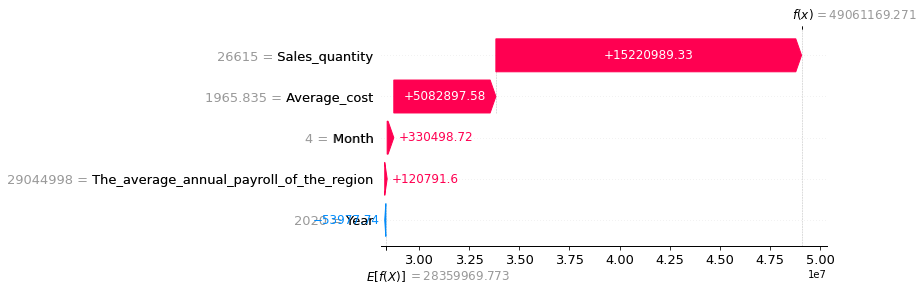

In [ ]:
shap.plots.waterfall(shap_values[15], max_display=30)

Summary Plot

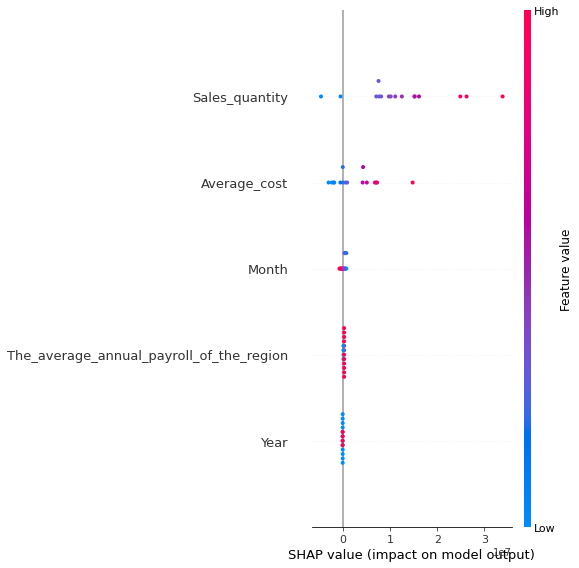

In [ ]:
ss = shap_summary(shap_values=shap_values, dataset=X_test)
ss

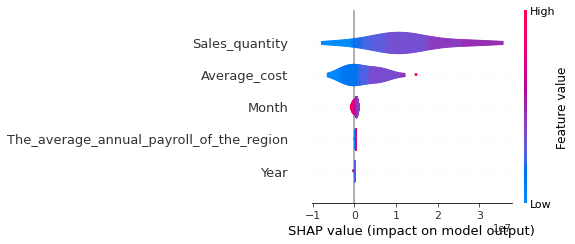

In [ ]:
shap.summary_plot(
    shap_values=shap_values,
    # features=X_test,
    feature_names=X_test.columns,
    plot_type='violin',
    layered_violin_max_num_bins=12,
    class_inds=range(7),
    use_log_scale=False,
    color='green'
)

Bar Plots

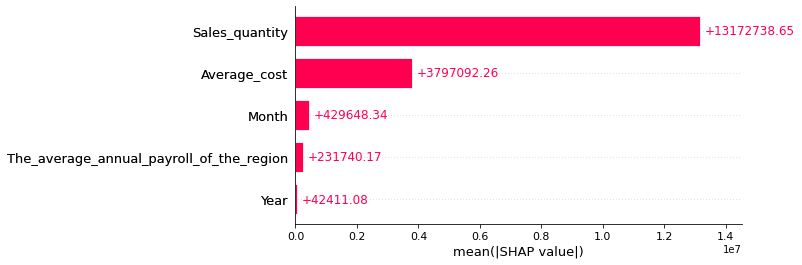

In [ ]:
shap.plots.bar(shap_values)

Summary Plots

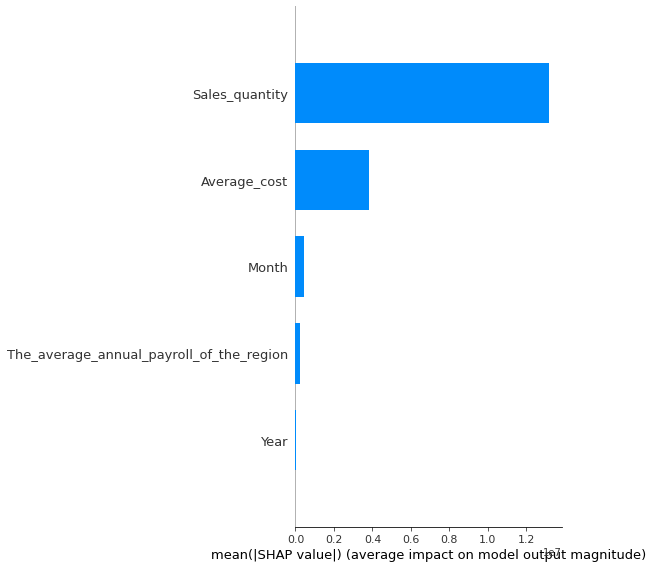

In [ ]:
si = shap_summary(shap_values=shap_values, dataset=X_test, plot_type='bar')
si

In [ ]:
X_test.shape

(16, 5)

In [ ]:
shap_values.shape

(16, 5)

Scatter Plots

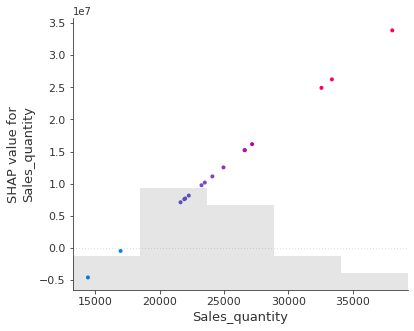

In [ ]:
shap.plots.scatter(shap_values[:,'Sales_quantity'], color=shap_values)

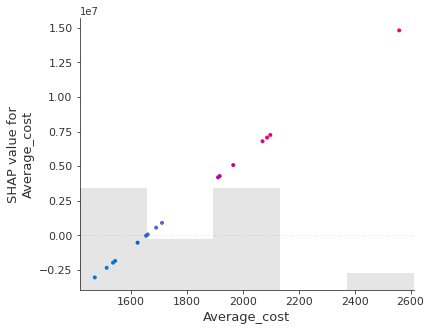

In [ ]:
shap.plots.scatter(shap_values[:,'Average_cost'], color=shap_values)